In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [2]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

# ==================== Part 1: Plotting ====================

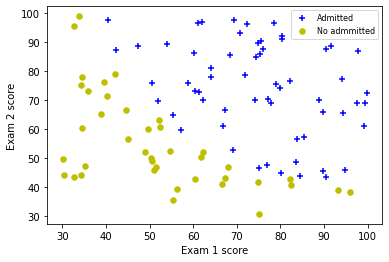

In [3]:
def plotData(X, y):
    adm = np.where(y == 1)
    no_adm = np.where(y == 0)
    p1 = plt.scatter(X[adm, 0], X[adm, 1], marker='+', s=30, color='b')
    p2 = plt.scatter(X[no_adm, 0], X[no_adm, 1], marker='o', s=30, color='y')
    plt.legend((p1, p2), ('Admitted', 'No admmitted'), loc='upper right', fontsize=8)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show
plotData(X, y)

# ============ Part 2: Compute Cost and Gradient ============

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def costFunction(initial_theta, X ,y):
    m = np.size(y, 0)
    h = sigmoid(X.dot(initial_theta))
    J = (-y.dot(np.log(h)) - (1-y).dot(np.log(1 - h))) / m
    grad = X.T.dot(h - y) / m
    return [J, grad]

In [5]:
[m, n] = np.shape(X)

# add intercept term to X
X = np.c_[np.ones([m,1]), X]

# Initialize fitting parameters
initial_theta = np.zeros([n+1,])

# Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

(100,) (100,)


# ============= Part 3: Optimizing using fminunc  =============

In [29]:
def gradFunction(theta, x, y):
    m = np.size(y, 0)
    grad = 1 / m * (x.T.dot(sigmoid(x.dot(theta)) - y))
    return grad
# op.minimize function fun must return a scalar, so redeclare costFunction
def costFunction(theta, x, y):
    m = np.size(y, 0)
    h = sigmoid(x.dot(theta))
    if np.sum(1-h < 1e-10) != 0:
        return np.inf
    j = -1/m*(y.dot(np.log(h))+(1-y).dot(np.log(1-h)))
    return j

In [31]:
result = op.minimize(fun = costFunction, x0 = initial_theta, args = (X, y), method = 'BFGS', jac = gradFunction)
theta = result.x
print('Cost the theta found %f' % result.fun)
print('Expected cost: 0.203')
print('Expected theta:', theta)
print('-25.161 0.206 0.201')

Cost the theta found 0.203498
Expected cost: 0.203
Expected theta: [-25.16133143   0.20623171   0.20147156]
-25.161 0.206 0.201


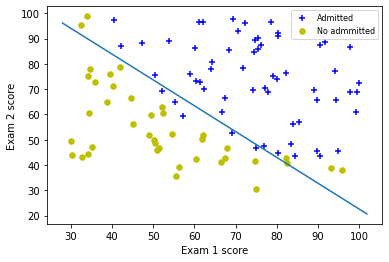

In [38]:
# plot boundary
def plotDecisionBoundary(theta, X, y):
    adm = np.where(y == 1)
    no_adm = np.where(y == 0)
    p1 = plt.scatter(X[adm, 1], X[adm, 2], marker='+', s=30, color='b')
    p2 = plt.scatter(X[no_adm, 1], X[no_adm, 2], marker='o', s=30, color='y')
    plot_x = np.array([np.min(X[:, 1])-2, np.max(X[:, 1]+2)])
    plot_y = -1/theta[2]*(theta[1]*plot_x+theta[0])
    plt.plot(plot_x, plot_y)
    plt.legend((p1, p2), ('Admitted', 'No admmitted'), loc='upper right', fontsize=8)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show
plotDecisionBoundary(theta, X, y)

# ============== Part 4: Predict and Accuracies ==============

In [41]:
prob = sigmoid(np.array([1, 45, 85]).dot(theta));
print('For a student with scores 45 and 85, we predict an admission probability of %f' % prob);
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.776290
Expected value: 0.775 +/- 0.002


In [50]:
def predict(theta, X):
    m = np.size(X, 0)
    p = np.zeros((m,))
    pos = np.where(X.dot(theta) >= 0)
    neg = np.where(X.dot(theta) < 0) 
    p[pos] = 1
    p[neg] = 0
    return p
# Compute accuracy on our training set
p = predict(theta, X);

print('Train Accuracy: %f' % (np.sum(p == y) / np.size(y) * 100));
print('Expected accuracy (approx): 89.0');

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
